In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#read data file
df = pd.read_csv('Linear_Reg_Sales.csv')


In [25]:
# display contents
df

,Advert,Sales
0,100,1000
1,200,1900
2,300,2900
3,400,4600
4,500,5300
5,600,6700
6,700,7111
7,800,8344
8,900,9777
9,1000,10077


In [26]:
# imort for plotting
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline

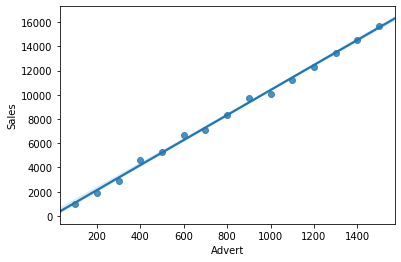

In [27]:
# sns.regplot is used for plotting linear regression lines
sns.regplot(x='Advert', y ='Sales', data = df)

In [28]:
#train the model
from sklearn import linear_model
from sklearn.model_selection import train_test_split

advert = df[['Advert']]
sales = df['Sales']

#default split ration is 25% for test set, hardcode ran_state: everytime it runs, the same random value is generated
x_train, x_test,y_train, y_test = train_test_split(advert, sales, random_state=1)


In [29]:
x_train

,Advert
10,1100
4,500
1,200
13,1400
0,100
14,1500
9,1000
8,900
12,1300
11,1200


In [30]:
x_test

,Advert
3,400
7,800
6,700
2,300


In [31]:
y_train

10    11222
4      5300
1      1900
13    14555
0      1000
14    15662
9     10077
8      9777
12    13444
11    12333
5      6700
Name: Sales, dtype: int64

In [32]:
y_test

3    4600
7    8344
6    7111
2    2900
Name: Sales, dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression

linReg=LinearRegression()

#fit linear model to the train data set 
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)

57.1826846703716
[10.34091739]


In [35]:
#Predict data
y_hat = linReg.predict(x_test)
print(x_test)


   Advert
3     400
7     800
6     700
2     300


In [36]:
print(y_test)

3    4600
7    8344
6    7111
2    2900
Name: Sales, dtype: int64


In [37]:
y_hat

array([4193.54964257, 8329.91660048, 7295.824861  , 3159.4579031 ])

In [38]:
#validate the model
# r2 close to 1 means our model gives pretty good result
from sklearn.metrics import r2_score
r2_score(y_test,y_hat)


0.9851944946887364

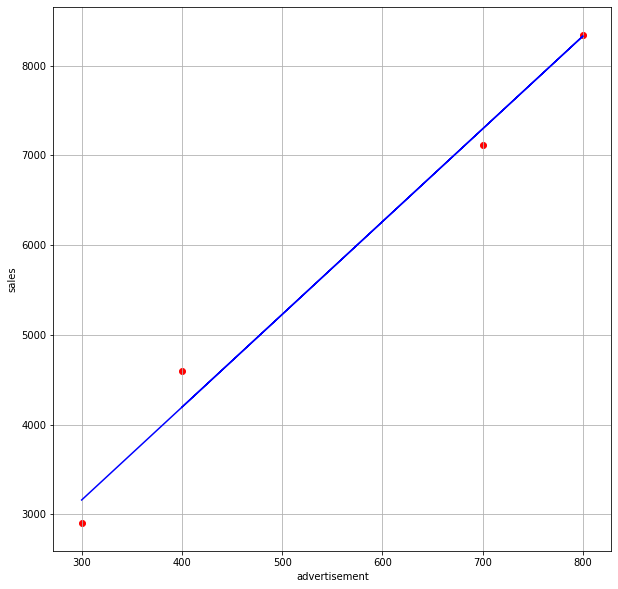

In [40]:
#plot the regression line
fig, ax= plt.subplots(figsize = (10,10))

ax.plot(x_test, y_hat, c='blue', label='Test data')
ax.scatter(x_test, y_test,c='red', label='Test points')
ax.set(xlabel='advertisement', ylabel ='sales')
ax.grid()
plt.show()